# Starbucks Worldwide Location Project

# CRISP-DM

# A. Business Understanding

**Business Objective**: The main objective of the project is to develop a predictive model that can accurately estimate the number of Starbucks stores in a country based on a set of variables, such as GDP per capita, population, and easy of doing business. 

**Business Success Criteria**: For this project, the business success criteria have at least a 0.7 R-Squared value for the model's predictions.

---

**Dataset**: Two datasets available on Kaggle were used for Starbucks numbers in countries. The first of them belongs to 2016, the other belongs to 2021. In addition, World Bank data were used for parameters such as GPD and population of countries. World Bank data was obtained with the wbgapi library.

[Starbucks Locations Worldwide 2016](https://www.kaggle.com/datasets/starbucks/store-locations)

[Starbucks Locations Worldwide 2021](https://www.kaggle.com/datasets/kukuroo3/starbucks-locations-worldwide-2021-version)

__Important note:__ _The Starbucks data set for 2021 was used only in the data analysis part with certain assumptions. The machine learning model was made according to the data set in 2016 and the World Bank data._

---

**Technologies and Tools**:

* Programming Language:
    * Python
* Tools:
    * Jupyter Notebook
* Libraries
    * Pandas
    * Numpy
    * Scikit-learn
    * LighGBM
    * CatBoost
    * XGBoost

Since the problem we are trying to solve involves predicting a continuous outcome, I will use regression models in both classical and relatively new machine learning models. This will allow us to explore different modeling approaches and compare their performance.

List of models I used in this project as a result of my research:
* Machine Learning Models
    * Linear Regression
    * Decision Tree Regression
    * Random Forest Regression
    * Boost Methods
        * XGBoost
        * LightGBM
        * CatBoost


# B. Data Understanding 

## B.1 Install Libraries

In [1]:
import numpy as np
import pandas as pd

import pycountry as pc
import pycountry_convert as pcc
import wbgapi as wb

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## B.2 Collect Initial Data

### B.2.1 Starbucks Worldwide Locations

In [2]:
starbucks_location_2016 = pd.read_csv('data/starbucks_locations_2016.csv', sep= ',')
starbucks_location_2021 = pd.read_csv('data/starbucks_locations_2022.csv', sep= ',')

### B.2.2 World Bank Dataset

In [3]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-12-22
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2022-06-23
15,Global Economic Monitor,GEM,3,2020-07-27


In [4]:
wb.series.info(q='population')

id,value
EN.ATM.PM25.MC.T1.ZS,"PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)"
EN.ATM.PM25.MC.T2.ZS,"PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)"
EN.ATM.PM25.MC.T3.ZS,"PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)"
EN.ATM.PM25.MC.ZS,"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)"
EN.POP.DNST,Population density (people per sq. km of land area)
EN.POP.EL5M.RU.ZS,Rural population living in areas where elevation is below 5 meters (% of total population)
EN.POP.EL5M.UR.ZS,Urban population living in areas where elevation is below 5 meters (% of total population)
EN.POP.EL5M.ZS,Population living in areas where elevation is below 5 meters (% of total population)
EN.POP.SLUM.UR.ZS,Population living in slums (% of urban population)
EN.URB.LCTY,Population in largest city


In [5]:
wb.data.DataFrame(series='SP.POP.TOTL', economy='all', time='2016')

,SP.POP.TOTL
economy,
ABW,104874.0
AFE,616377331.0
AFG,34636207.0
AFW,419778384.0
AGO,29154746.0
...,...
XKX,1777557.0
YEM,29274002.0
ZAF,56422274.0


## B.3 Describe Data

In [6]:
starbucks_location_2016.shape, starbucks_location_2021.shape

((25600, 13), (28289, 17))

In [7]:
starbucks_location_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [8]:
starbucks_location_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28289 entries, 0 to 28288
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              28289 non-null  int64  
 1   storeNumber             28289 non-null  object 
 2   countryCode             28289 non-null  object 
 3   ownershipTypeCode       28289 non-null  object 
 4   schedule                23204 non-null  object 
 5   slug                    28289 non-null  object 
 6   latitude                28289 non-null  float64
 7   longitude               28289 non-null  float64
 8   streetAddressLine1      28288 non-null  object 
 9   streetAddressLine2      7966 non-null   object 
 10  streetAddressLine3      5136 non-null   object 
 11  city                    28288 non-null  object 
 12  countrySubdivisionCode  28289 non-null  object 
 13  postalCode              27488 non-null  object 
 14  currentTimeOffset       28289 non-null

In [9]:
# All data in starbucks_location_2021 are assumed to be brands of Starbucks
starbucks_location_2016['Brand'].value_counts()

Starbucks                25249
Teavana                    348
Evolution Fresh              2
Coffee House Holdings        1
Name: Brand, dtype: int64

### B.3.1 Check Duplicate Value

In [10]:
starbucks_location_2016.duplicated().value_counts()

False    25600
dtype: int64

In [11]:
starbucks_location_2021.duplicated().value_counts()

False    28289
dtype: int64

In [12]:
starbucks_location_2016.duplicated(subset=['Store Number']).value_counts()

False    25599
True         1
dtype: int64

In [13]:
starbucks_location_2021.duplicated(subset=['storeNumber']).value_counts()

False    28289
dtype: int64

### B.3.2 Check Empty Value

In [14]:
# Calculate the percentage of null values in each column, and then sort the columns by the percentage of null values
starbucks_location_2016.isnull().mean().mul(100).sort_values(ascending=False).round(2)

Phone Number      26.80
Postcode           5.95
City               0.06
Street Address     0.01
Longitude          0.00
Latitude           0.00
Brand              0.00
Store Number       0.00
Store Name         0.00
Ownership Type     0.00
State/Province     0.00
Country            0.00
Timezone           0.00
dtype: float64

In [15]:
starbucks_location_2021.isnull().mean().mul(100).sort_values(ascending=False).round(2)

streetAddressLine3        81.84
streetAddressLine2        71.84
schedule                  17.98
postalCode                 2.83
streetAddressLine1         0.00
city                       0.00
windowsTimeZoneId          0.00
currentTimeOffset          0.00
countrySubdivisionCode     0.00
Unnamed: 0                 0.00
storeNumber                0.00
longitude                  0.00
latitude                   0.00
slug                       0.00
ownershipTypeCode          0.00
countryCode                0.00
olsonTimeZoneId            0.00
dtype: float64

# C. Data Preparation

## C.1 Data Selection

Since both Stabucks location datasets are not very large, the entire dataset will be used. <br>
In addition, factors that may affect the number of Starbucks in a country were taken from the world bank database. <br>
These are 
* GDP per capital
* Population
* Urban population
* Easy of doing business parameter

In [16]:
population = wb.data.DataFrame(series='SP.POP.TOTL', economy='all', time='2016')
population.reset_index(inplace=True)
population.rename(columns={'economy': 'Country', 'SP.POP.TOTL': 'POP'}, inplace=True)
population

,Country,POP
0,ABW,104874.0
1,AFE,616377331.0
2,AFG,34636207.0
3,AFW,419778384.0
4,AGO,29154746.0
...,...,...
261,XKX,1777557.0
262,YEM,29274002.0
263,ZAF,56422274.0
264,ZMB,16767761.0


In [17]:
ease_of_business = wb.data.DataFrame(series='IC.BUS.DFRN.XQ', economy='all', time=2016).round(2)
ease_of_business.reset_index(inplace=True)
ease_of_business.rename(columns={'economy': 'Country', 'IC.BUS.DFRN.XQ': 'EODB'}, inplace=True)
ease_of_business

,Country,EODB
0,ABW,NaN
1,AFE,50.57
2,AFG,38.94
3,AFW,46.04
4,AGO,37.65
...,...,...
261,XKX,64.91
262,YEM,31.21
263,ZAF,65.41
264,ZMB,60.25


In [18]:
gdp_pcap = wb.data.DataFrame(series='NY.GDP.PCAP.CD', economy='all', time='2016').round(2)
gdp_pcap.reset_index(inplace=True)
gdp_pcap.rename(columns={'economy': 'Country', 'NY.GDP.PCAP.CD': 'GDP PCAP'}, inplace=True)
gdp_pcap

,Country,GDP PCAP
0,ABW,28451.27
1,AFE,1432.11
2,AFG,520.25
3,AFW,1645.02
4,AGO,1709.52
...,...,...
261,XKX,3759.56
262,YEM,1069.82
263,ZAF,5735.07
264,ZMB,1249.92


In [19]:
urban_population = wb.data.DataFrame(series='SP.URB.TOTL', economy='all', time=2016)
urban_population.reset_index(inplace=True)
urban_population.rename(columns={'economy':'Country', 'SP.URB.TOTL': 'URB POP'}, inplace=True)
urban_population

,Country,URB POP
0,ABW,45297.0
1,AFE,215083329.0
2,AFG,8665979.0
3,AFW,190684610.0
4,AGO,18702478.0
...,...,...
261,XKX,NaN
262,YEM,10361240.0
263,ZAF,36866878.0
264,ZMB,7115902.0


In [20]:
number_of_starbucks = starbucks_location_2016.groupby('Country').count()['Store Number'].sort_values(ascending=False).to_frame()
number_of_starbucks.reset_index(inplace=True)
number_of_starbucks

,Country,Store Number
0,US,13608
1,CN,2734
2,CA,1468
3,JP,1237
4,KR,993
...,...,...
68,CW,3
69,AW,3
70,MC,2
71,LU,2


## C.2 Data Reduction

Select a subset of the data that is relevant to the business objectives and discarding the rest.

### Starbuck Location 2016

In [21]:
starbucks_location_2016 = starbucks_location_2016[starbucks_location_2016['Brand'] == 'Starbucks']

In [22]:
starbucks_location_2016 = starbucks_location_2016.drop(columns=['Timezone', 'Phone Number', 'Postcode', 'Brand', 'Store Name', 'Street Address'])

### Starbucks Location 2021

In [23]:
starbucks_location_2021 = starbucks_location_2021.drop(columns=['Unnamed: 0', 'schedule', 'postalCode', 'windowsTimeZoneId', 'currentTimeOffset','olsonTimeZoneId', 'streetAddressLine1', 'streetAddressLine2', 'streetAddressLine3', 'slug'])

## C.3 Data Transformation

Transforming of data to make it more suitable for analysis

### Starbucks Location 2016

In [24]:
# Add continent information according to country alpha2 code
starbucks_location_2016['Continent'] = starbucks_location_2016['Country'].apply(lambda country: pcc.country_alpha2_to_continent_code(country))
starbucks_location_2016['Continent'] = starbucks_location_2016['Continent'].apply(lambda continent: pcc.convert_continent_code_to_continent_name(continent))

In [25]:
starbucks_location_2016['Country'] = starbucks_location_2016['Country'].apply(lambda country: pc.countries.get(alpha_2=country).name)

In [26]:
starbucks_location_2016 = starbucks_location_2016.reindex(columns=['Store Number', 'Ownership Type', 'Continent', 'Country', 'City', 'State/Province', 'Longitude', 'Latitude'])

### Starbucks Location 2021

In [27]:
starbucks_location_2021 = starbucks_location_2021.rename(columns={'storeNumber': 'Store Number', 
                          'countryCode': 'Country', 
                          'ownershipTypeCode': 'Ownership Type',
                          'latitude': 'Latitude',
                          'longitude': 'Longitude',
                          'city': 'City',
                          'countrySubdivisionCode': 'State/Province'})

In [28]:
starbucks_location_2021['Continent'] = starbucks_location_2021['Country'].apply(lambda country: pcc.country_alpha2_to_continent_code(country))
starbucks_location_2021['Continent'] = starbucks_location_2021['Continent'].apply(lambda continent: pcc.convert_continent_code_to_continent_name(continent))

In [29]:
starbucks_location_2021['Country'] = starbucks_location_2021['Country'].apply(lambda country: pc.countries.get(alpha_2=country).name)

In [30]:
starbucks_location_2021 = starbucks_location_2021.reindex(columns=['Store Number', 'Ownership Type', 'Continent', 'Country', 'City', 'State/Province', 'Longitude', 'Latitude'])

In [31]:
starbucks_location_2021["Ownership Type"] = starbucks_location_2021["Ownership Type"].map({'LS': 'Licensed', 'CO': 'Company Owner', 'JV': 'Join Venture', 'FR': 'Franchise'})

In [32]:
starbucks_location_2016['Status'] = starbucks_location_2016['Store Number'].isin(starbucks_location_2021['Store Number'])
starbucks_location_2016['Status'] = starbucks_location_2016['Status'].replace({True: 'Active', False: 'Closed'})

In [33]:
starbucks_location_2021['Status'] = starbucks_location_2021['Store Number'].isin(starbucks_location_2016['Store Number'])
starbucks_location_2021['Status'] = starbucks_location_2021['Status'].replace({True: 'Active', False: 'Opened'})

## C.4 Data Cleaning

In [34]:
starbucks_location_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25249 entries, 0 to 25599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store Number    25249 non-null  object 
 1   Ownership Type  25249 non-null  object 
 2   Continent       25249 non-null  object 
 3   Country         25249 non-null  object 
 4   City            25234 non-null  object 
 5   State/Province  25249 non-null  object 
 6   Longitude       25248 non-null  float64
 7   Latitude        25248 non-null  float64
 8   Status          25249 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.9+ MB


In [35]:
starbucks_location_2016["Store Number"].duplicated().value_counts()

False    25248
True         1
Name: Store Number, dtype: int64

In [36]:
starbucks_location_2016 = starbucks_location_2016.drop_duplicates(subset=['Store Number'])

In [37]:
ease_of_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  266 non-null    object 
 1   EODB     237 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [38]:
ease_of_business.fillna(value=ease_of_business['EODB'].mean(), inplace=True)

In [39]:
ease_of_business.isna().value_counts()

Country  EODB 
False    False    266
dtype: int64

## C.5 Data Analysis

### You can check the Power BI dashboard in the repository for detailed analysis.

In [40]:
analysis_dataframe = pd.concat([starbucks_location_2016, starbucks_location_2021]).drop_duplicates(subset=['Store Number'])

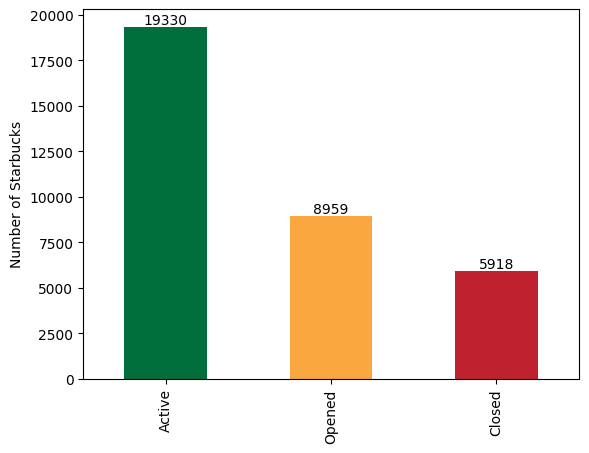

In [41]:
global_situation = analysis_dataframe['Status'].value_counts()
global_situation.plot(kind="bar", ylabel="Number of Starbucks", color=["#006f3c", "#f9a73e", "#bf212f"])

# Add values to the top of the bars
for index, value in enumerate(global_situation):
    plt.text(index, value, str(int(value)), ha='center', va='bottom') 
    
plt.show()

In [42]:
closed = analysis_dataframe.loc[analysis_dataframe['Status'] == 'Closed'].groupby(by='Country')['Status'].count()
opened = analysis_dataframe.loc[analysis_dataframe['Status'] == 'Opened'].groupby(by='Country')['Status'].count()
active = analysis_dataframe.loc[analysis_dataframe['Status'] == 'Active'].groupby(by='Country')['Status'].count()

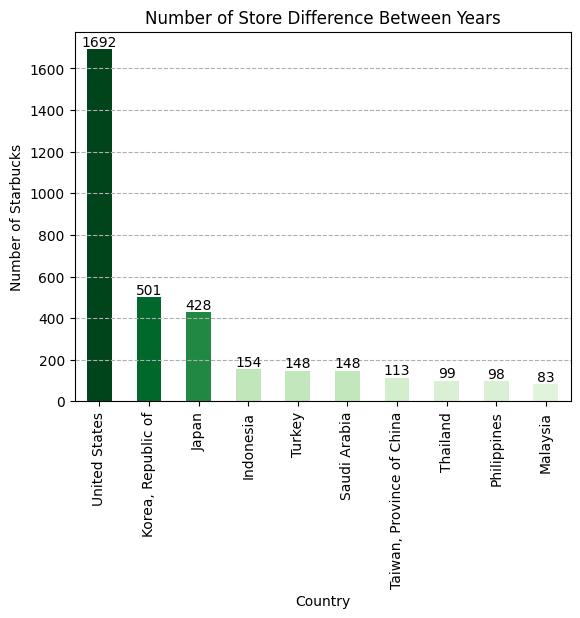

In [43]:
difference = (opened - closed).sort_values(ascending=False).dropna().head(10)
difference.plot(kind="bar", 
                title="Number of Store Difference Between Years", 
                xlabel="Country",
                ylabel="Number of Starbucks")

# Add values to the top of the bars
for index, value in enumerate(difference):
    plt.text(index, value, str(int(value)), ha='center', va='bottom')
    
# Create a color map with a gradient of colors
cmap = cm.get_cmap('Greens')
colors = cmap(3 * difference / difference.max())

# Plot the Series as a bar chart
difference.plot(kind='bar', color=colors)   
    
plt.grid(True, axis='y', linestyle='dashed')
plt.show()

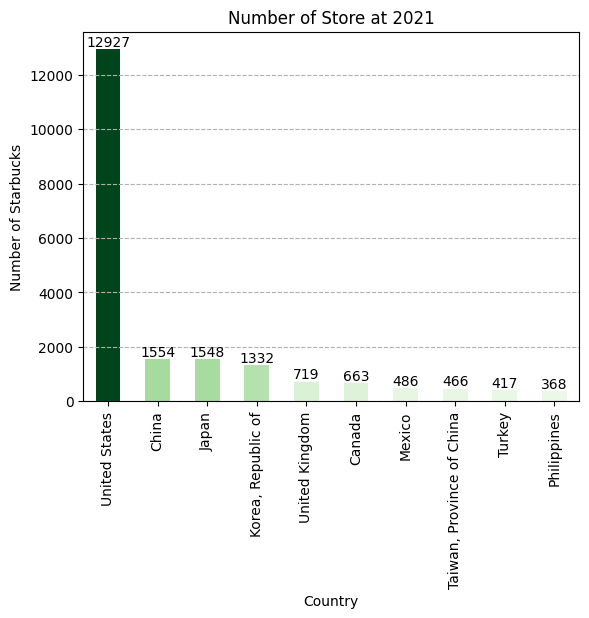

In [44]:
total = (active + opened - closed).sort_values(ascending=False).dropna().head(10)
total.plot(kind="bar", 
                title="Number of Store at 2021", 
                xlabel="Country",
                ylabel="Number of Starbucks")

# Add values to the top of the bars
for index, value in enumerate(total):
    plt.text(index, value, str(int(value)), ha='center', va='bottom')
    
# Create a color map with a gradient of colors
cmap = cm.get_cmap('Greens')
colors = cmap(3 * total / total.max())

# Plot the Series as a bar chart
total.plot(kind='bar', color=colors)    
    
plt.grid(True, axis='y', linestyle='dashed')
plt.show()

## C.6 Data Integration

In [45]:
number_of_starbucks['Country'] = number_of_starbucks['Country'].apply(lambda country: pcc.country_alpha2_to_country_name(country))
number_of_starbucks['Country'] = number_of_starbucks['Country'].apply(lambda country: pcc.country_name_to_country_alpha3(country))

In [46]:
number_of_starbucks = pd.merge(number_of_starbucks, gdp_pcap, on='Country', how='inner')
number_of_starbucks = pd.merge(number_of_starbucks, population, on='Country', how='inner')
number_of_starbucks = pd.merge(number_of_starbucks, ease_of_business, on='Country', how='inner')
number_of_starbucks = pd.merge(number_of_starbucks, urban_population, on='Country', how='left')

In [47]:
number_of_starbucks = number_of_starbucks[['Country', 'GDP PCAP', 'POP', 'URB POP', 'EODB', 'Store Number']]

In [48]:
number_of_starbucks

,Country,GDP PCAP,POP,URB POP,EODB,Store Number
0,USA,57866.74,3.230718e+08,264473000.0,83.590000,13608
1,CHN,8094.36,1.387790e+09,787376534.0,63.790000,2734
2,CAN,42315.60,3.610949e+07,29357013.0,79.540000,1468
3,JPN,39375.47,1.270760e+08,116219897.0,77.940000,1237
4,KOR,29288.87,5.121780e+07,41774264.0,83.970000,993
...,...,...,...,...,...,...
67,CUW,18881.83,1.596640e+05,142535.0,59.962363,3
68,ABW,28451.27,1.048740e+05,45297.0,59.962363,3
69,MCO,174610.64,3.707100e+04,37071.0,59.962363,2
70,LUX,106899.29,5.820140e+05,526490.0,69.170000,2


In [49]:
number_of_starbucks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       72 non-null     object 
 1   GDP PCAP      72 non-null     float64
 2   POP           72 non-null     float64
 3   URB POP       72 non-null     float64
 4   EODB          72 non-null     float64
 5   Store Number  72 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.9+ KB


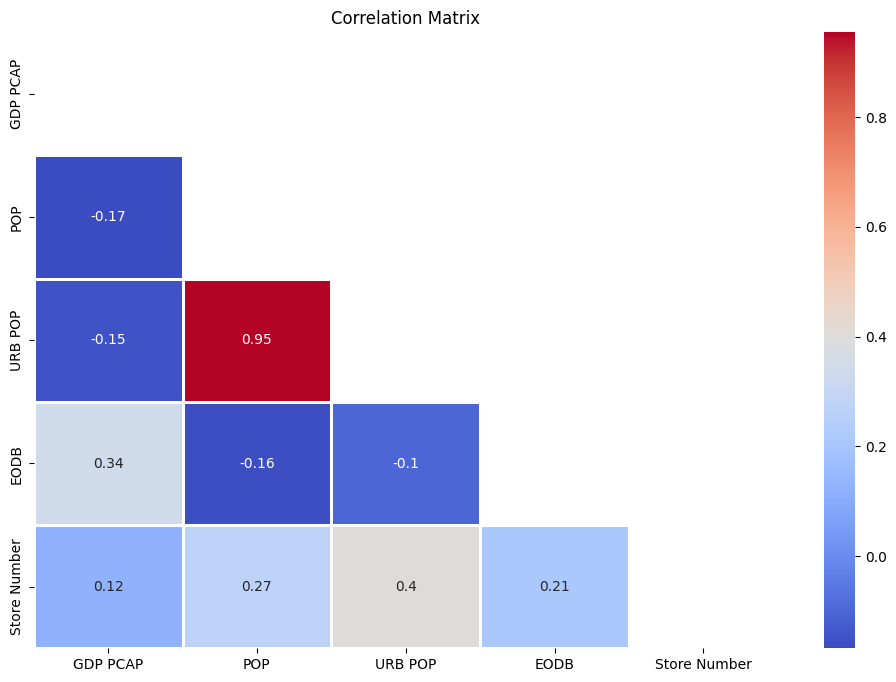

In [50]:
mask = np.zeros_like(number_of_starbucks.corr(numeric_only=True))
mask[np.triu_indices_from(mask)] = True
components = ['GDP PCAP', 'POP', 'URB POP', 'EODB', 'Store Number']
sns.heatmap(number_of_starbucks.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.75, mask = mask, xticklabels= components, yticklabels= components)
plt.title('Correlation Matrix')
plt.gcf().set_size_inches(12, 8)
plt.show()

# D. Modelling

## D.1 Split The Data

## D.2 Train the model

### D.2.1 Linear Regression

### D.2.2 Decision Tree Regression

### D.2.3 Random Forest Regression

### D.2.4 XGBoost Regression

### D.2.5 LightGBM Regression

## D.3 Evaluate Models

## D.4 Fine-Tune The Models

### D.4.1 XGBoost

### D.4.2 Decision Tree Regression

# E. Evaluation